<a href="https://colab.research.google.com/github/priyarameshd/DecisionTree/blob/main/DecisionTree_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sb

Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [ ]:
fraudCheck_df = pd.read_csv('Fraud_check.csv')

### EDA

In [ ]:
fraudCheck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
#Rename
fraudCheck_df.rename(columns={"Marital.Status":"MaritalStatus",
                              "Taxable.Income":"TaxableIncome",
                              "City.Population":"CityPopulation",
                              "Work.Experience":"WorkExperience"},inplace=True)

In [ ]:
fraudCheck_df.isnull().sum()

Undergrad         0
MaritalStatus     0
TaxableIncome     0
CityPopulation    0
WorkExperience    0
Urban             0
dtype: int64

In [ ]:
fraudCheck_df.duplicated().sum()

0

In [ ]:
fraudCheck_df.corr()

<ipython-input-10-5d59063c3c1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fraudCheck_df.corr()


,TaxableIncome,CityPopulation,WorkExperience
TaxableIncome,1.000000,-0.064387,-0.001818
CityPopulation,-0.064387,1.000000,0.013135
WorkExperience,-0.001818,0.013135,1.000000


TaxableIncome has negative correlation with population and experience.population and experience are having a positive correlation.

In [ ]:
fraudCheck_df.describe()

,TaxableIncome,CityPopulation,WorkExperience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<Axes: >

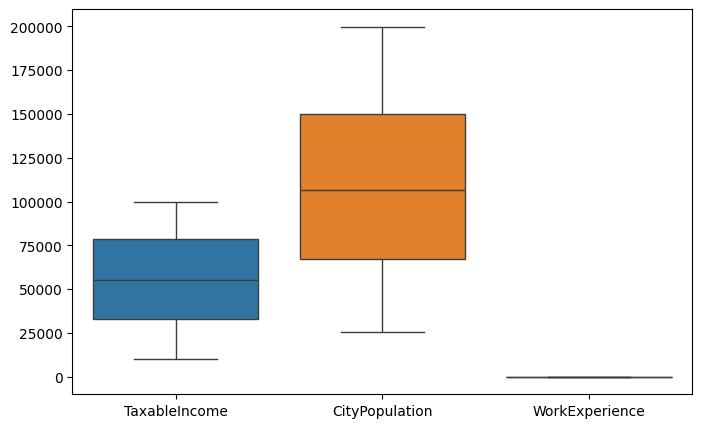

In [ ]:
plt.figure(figsize=(8,5))
sb.boxplot(data=fraudCheck_df)

No outliers in the dataset.

In [ ]:
fraudCheck_df=pd.get_dummies(fraudCheck_df,columns=['Undergrad','MaritalStatus','Urban'], drop_first=True)

In [ ]:
fraudCheck_df['Fraud'] = pd.cut(fraudCheck_df.TaxableIncome, bins=[10000,30000,99620],
                      labels=['Risky','Good'])
fraudCheck_df.head(5)

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES,Fraud
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [ ]:
(fraudCheck_df['TaxableIncome']<=30000).value_counts()


False    476
True     124
Name: TaxableIncome, dtype: int64

Convert entire dataset into numbers using encoders

In [ ]:
fraudCheck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   TaxableIncome          600 non-null    int64   
 1   CityPopulation         600 non-null    int64   
 2   WorkExperience         600 non-null    int64   
 3   Undergrad_YES          600 non-null    uint8   
 4   MaritalStatus_Married  600 non-null    uint8   
 5   MaritalStatus_Single   600 non-null    uint8   
 6   Urban_YES              600 non-null    uint8   
 7   Fraud                  600 non-null    category
dtypes: category(1), int64(3), uint8(4)
memory usage: 17.2 KB


In [ ]:
#fraudCheck_df['Undergrad_YES'] = np.int8(fraudCheck_df['Undergrad_YES'])
#fraudCheck_df['MaritalStatus_Married'] = np.int8(fraudCheck_df['MaritalStatus_Married'])
#fraudCheck_df['MaritalStatus_Single'] = np.int8(fraudCheck_df['MaritalStatus_Single'])
#fraudCheck_df['Urban_YES'] = np.int8(fraudCheck_df['Urban_YES'])


In [ ]:
# Fraud chnage label data to numeric data
label_encoder = preprocessing.LabelEncoder()
fraudCheck_df['Fraud'] =  label_encoder.fit_transform(fraudCheck_df['Fraud'])

In [ ]:

fraudCheck_df['Fraud'] = np.int8(fraudCheck_df['Fraud'])

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
df_norm = norm_func(fraudCheck_df)
df_norm.head(2)

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES,Fraud
0,0.656468,0.139472,0.333333,0.0,0.0,1.0,1.0,0.0
1,0.264428,0.622394,0.600000,1.0,0.0,0.0,1.0,0.0


In [ ]:
x=df_norm.drop(columns=['Fraud','TaxableIncome'],axis=1)
y=df_norm['Fraud']

In [ ]:
x.head(5)

,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [ ]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Fraud, dtype: float64

In [ ]:
features =x
labels = y

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,stratify = labels,random_state=42)

#   x,y, test_size=0.2,random_state=42)

In [ ]:
x_train.tail(1)

,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES
413,0.500641,0.366667,1.0,0.0,1.0,1.0



Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,min_samples_leaf=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

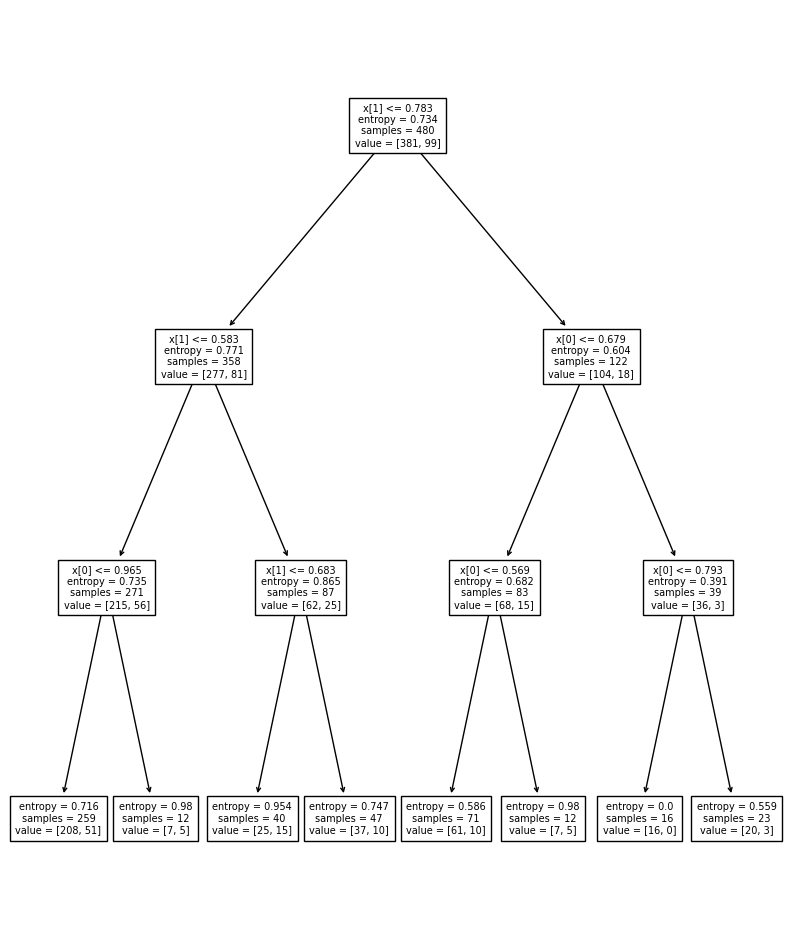

In [ ]:
plt.figure(figsize=(10,12))
tree.plot_tree(model,fontsize=7);

In [ ]:
colnames = list(features.columns)
colnames

['CityPopulation',
 'WorkExperience',
 'Undergrad_YES',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Urban_YES']

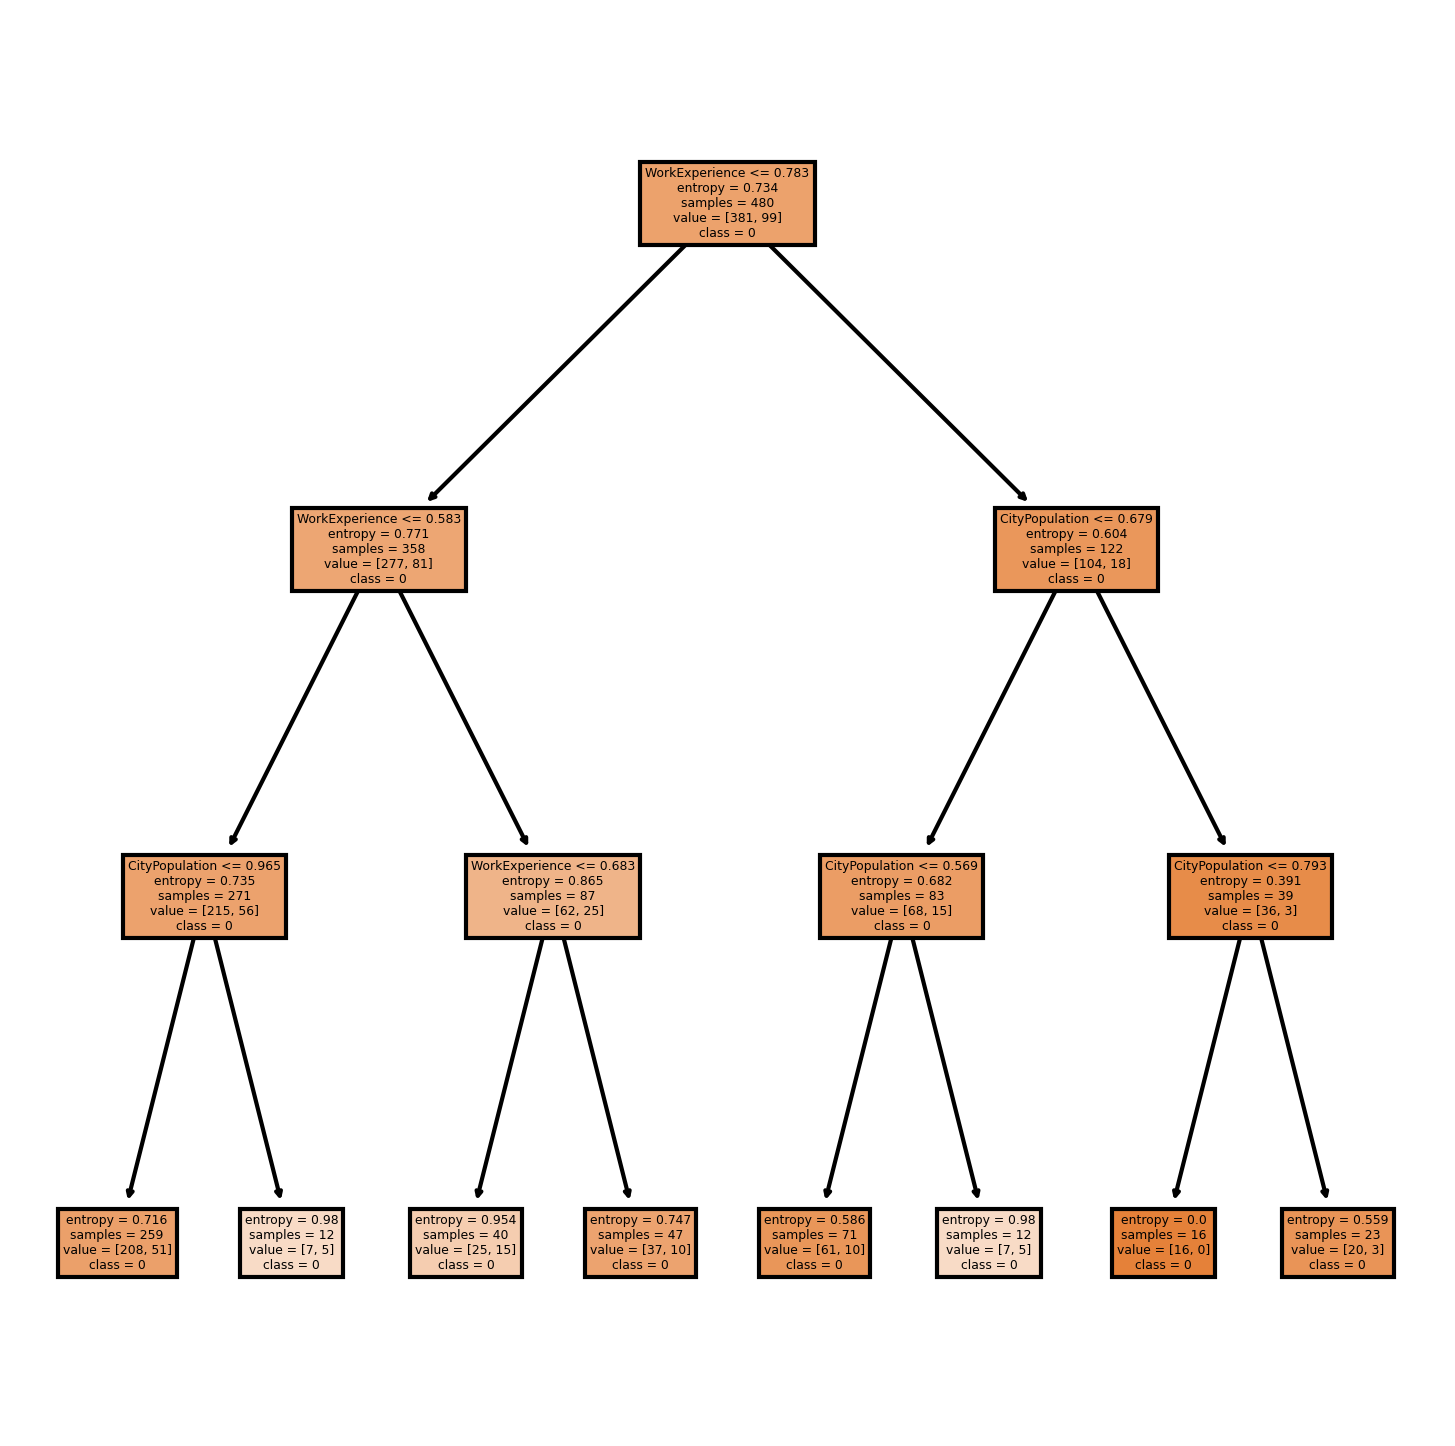

In [ ]:
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = colnames,
               class_names=cn,
               filled = True);


In [ ]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_1 <= 0.78
|   |--- feature_1 <= 0.58
|   |   |--- feature_0 <= 0.96
|   |   |   |--- class: 0.0
|   |   |--- feature_0 >  0.96
|   |   |   |--- class: 0.0
|   |--- feature_1 >  0.58
|   |   |--- feature_1 <= 0.68
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.68
|   |   |   |--- class: 0.0
|--- feature_1 >  0.78
|   |--- feature_0 <= 0.68
|   |   |--- feature_0 <= 0.57
|   |   |   |--- class: 0.0
|   |   |--- feature_0 >  0.57
|   |   |   |--- class: 0.0
|   |--- feature_0 >  0.68
|   |   |--- feature_0 <= 0.79
|   |   |   |--- class: 0.0
|   |   |--- feature_0 >  0.79
|   |   |   |--- class: 0.0



In [ ]:
model.feature_importances_

array([0.59908405, 0.40091595, 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=colnames).sort_values(ascending=False)
feature_imp

CityPopulation           0.599084
WorkExperience           0.400916
Undergrad_YES            0.000000
MaritalStatus_Married    0.000000
MaritalStatus_Single     0.000000
Urban_YES                0.000000
dtype: float64

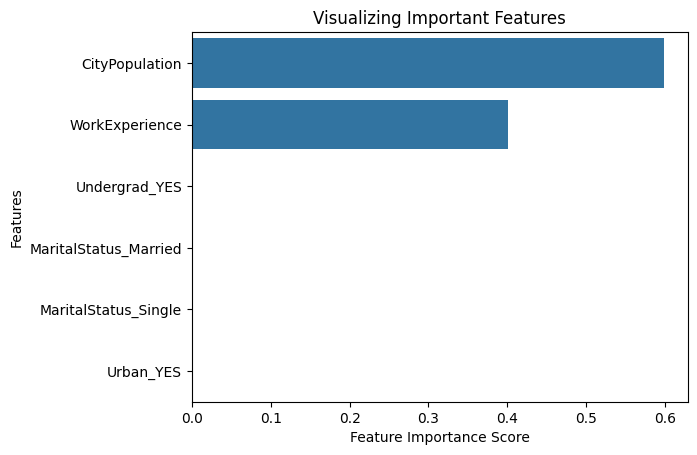

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0.0    120
dtype: int64

In [ ]:
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
pd.crosstab(y_test,preds)

col_0,0.0
Fraud,
0.0,95
1.0,25


Accuracy

In [ ]:
np.mean(preds==y_test)

0.7916666666666666

### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

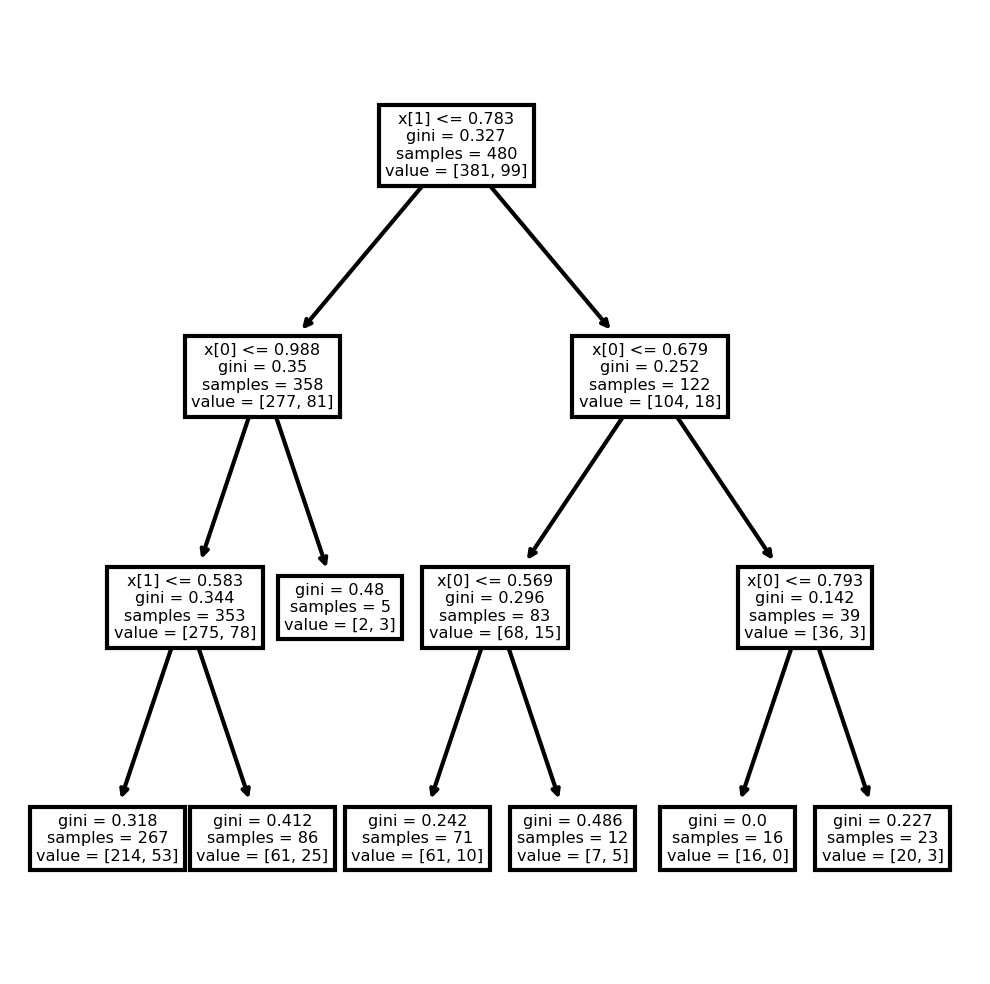

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(model_gini);

In [ ]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7916666666666666

In [ ]:
model.feature_importances_

array([0.59908405, 0.40091595, 0.        , 0.        , 0.        ,
       0.        ])


### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df_norm.values
X = features
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
model.score(X_test,y_test)

-0.02901285764051309

In [ ]:
model.score(X_train, y_train)

0.06607831525855579

### Pre Pruning

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    classes = [0,1,2]
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.8020833333333334
Test score 0.7916666666666666
Train Confusion matrix


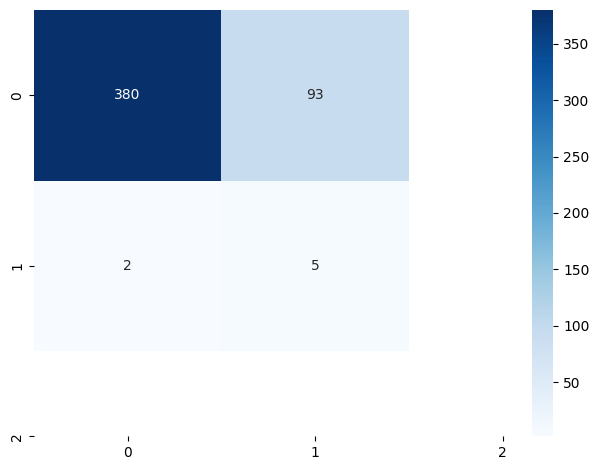

Test Confusion matrix


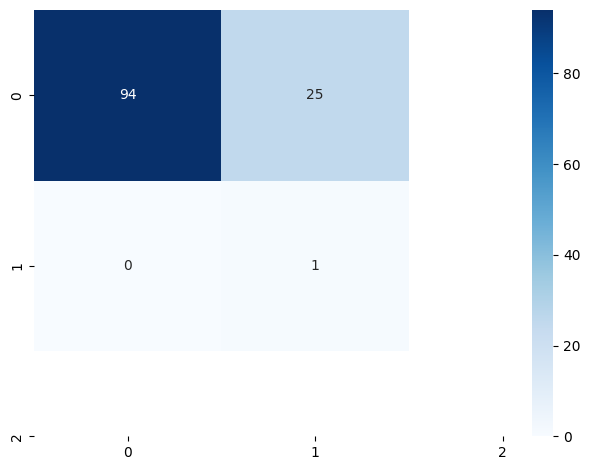

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

### PostPruning

In [83]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00138889 0.00138889 0.00152778 0.0015625  0.0015625
 0.00162281 0.00166667 0.00173611 0.00173611 0.00173611 0.00173611
 0.00173611 0.00178571 0.00180556 0.00182292 0.00185185 0.001875
 0.00187622 0.00188194 0.00189394 0.00190972 0.00190972 0.00192308
 0.00197368 0.00207583 0.00209984 0.00214286 0.00225443 0.00243056
 0.00248016 0.0025     0.00260417 0.00265725 0.00267094 0.00267337
 0.00275174 0.00283565 0.00293403 0.00312057 0.003125   0.00357901
 0.00379409 0.00420188 0.00600341]


In [84]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

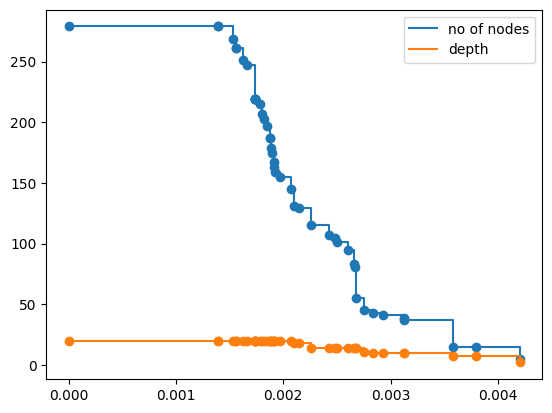

In [85]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

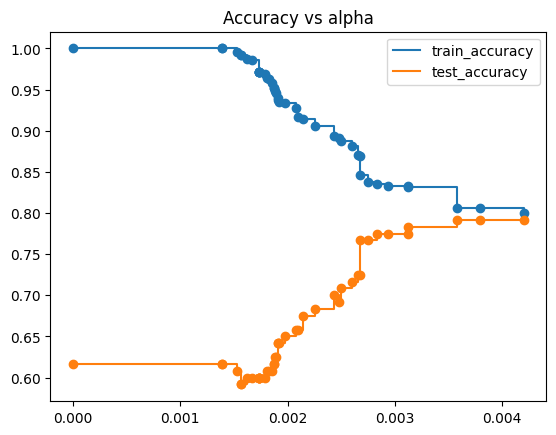

In [86]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8
Test score 0.7916666666666666
Train Confusion matrix


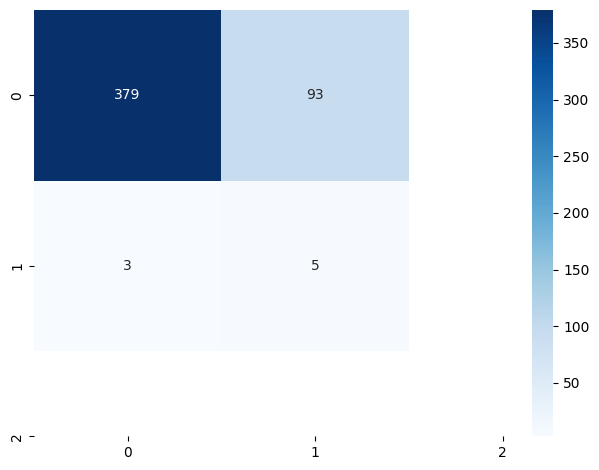

Test Confusion matrix


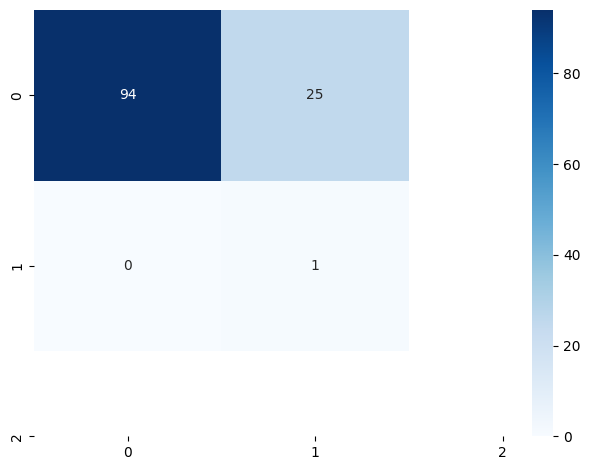

In [89]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.004)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Accuracy is improved to 79% for tesst data.

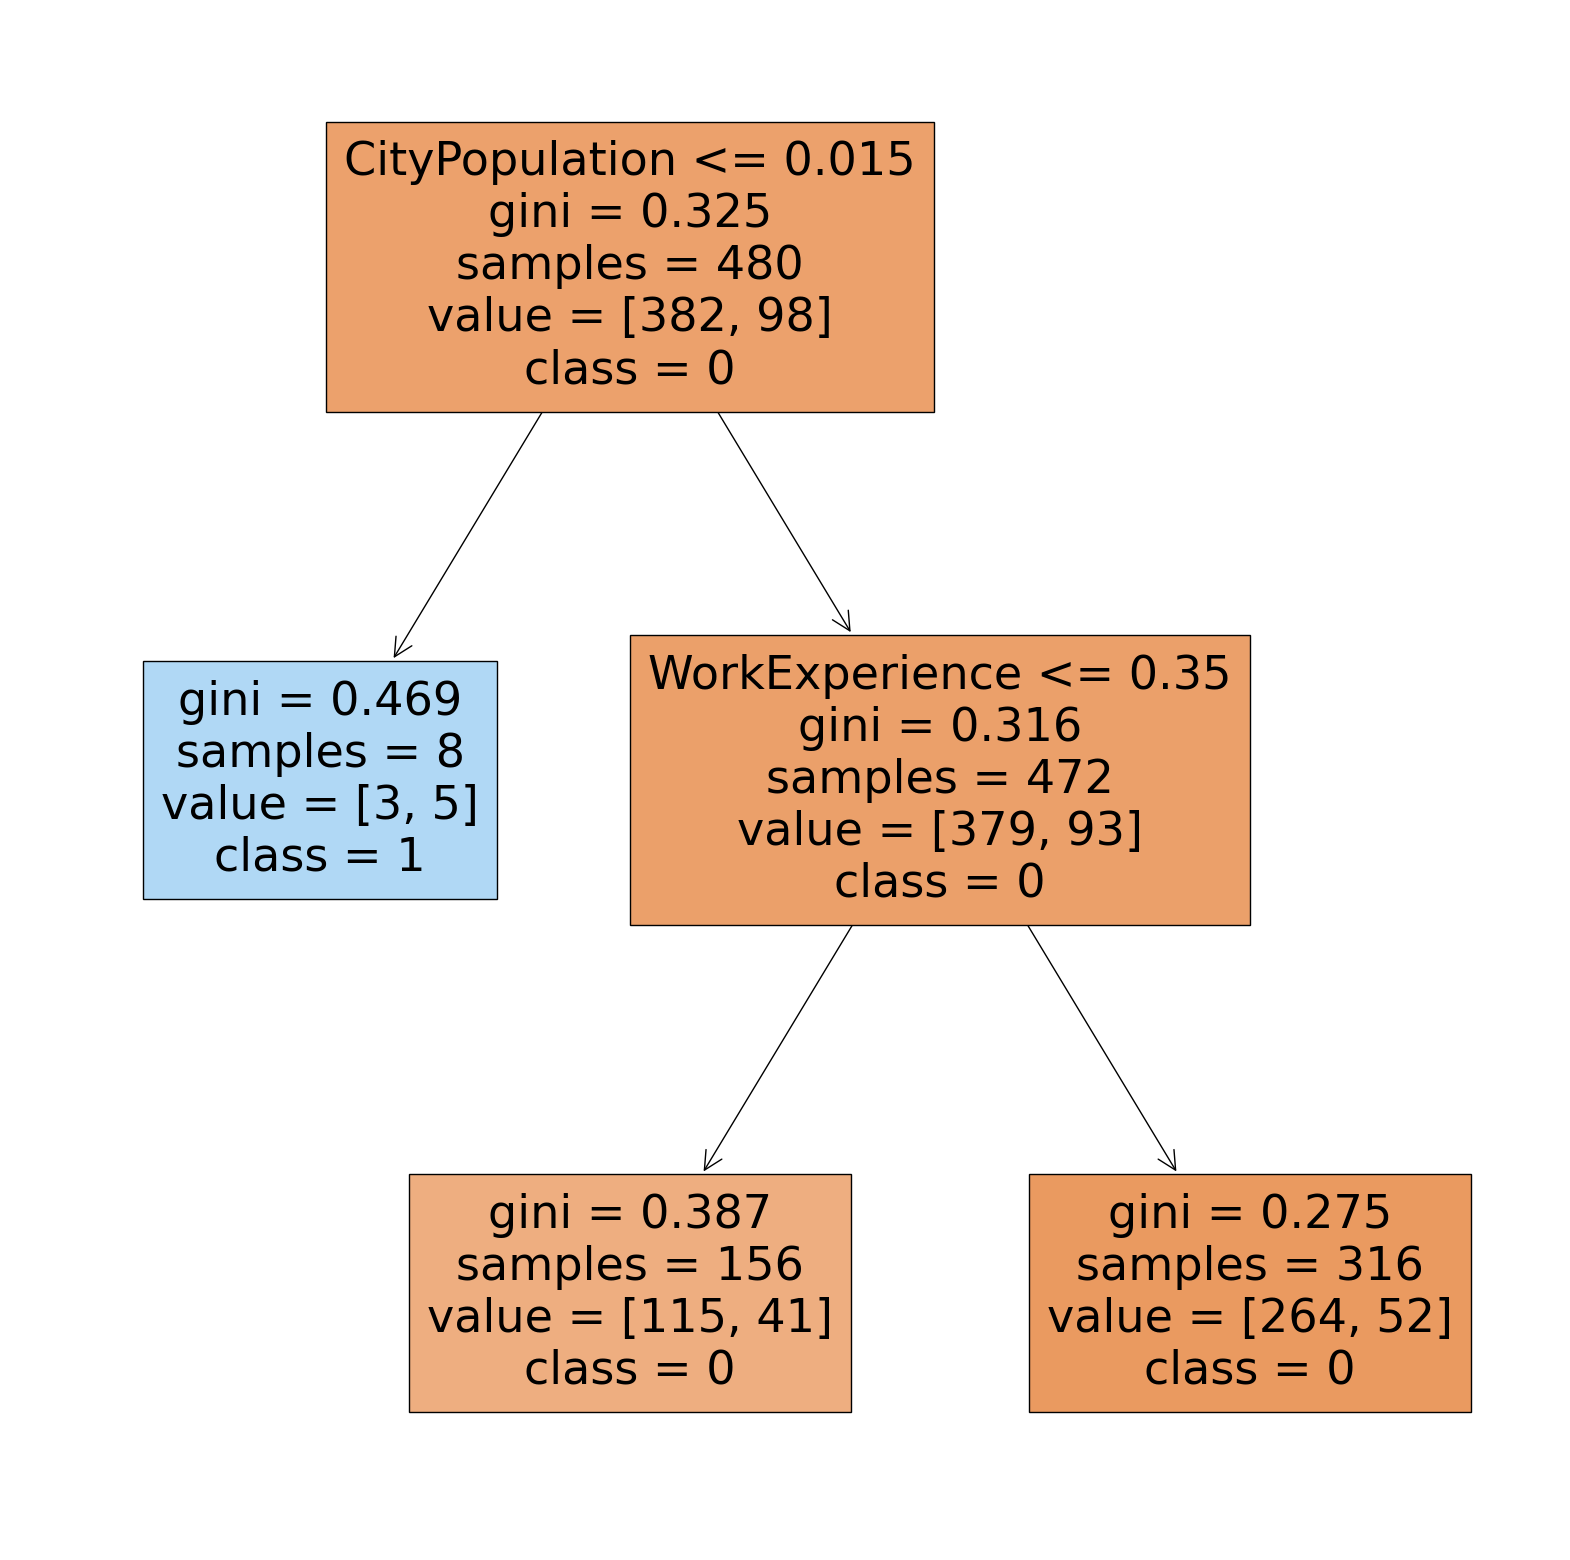

In [90]:
plt.figure(figsize=(20,20))
features = x.columns
classes = ['0','1']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()